In [1]:
#!pip install ydata-profiling

In [2]:
from ydata_profiling import ProfileReport
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
#profile=ProfileReport(df,title='Profiling Report')
#profile.to_file('housing.html')
#profile

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [7]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [8]:
round(df.isnull().sum()/len(df)*100,2)

,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,1.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0
ocean_proximity,0.0


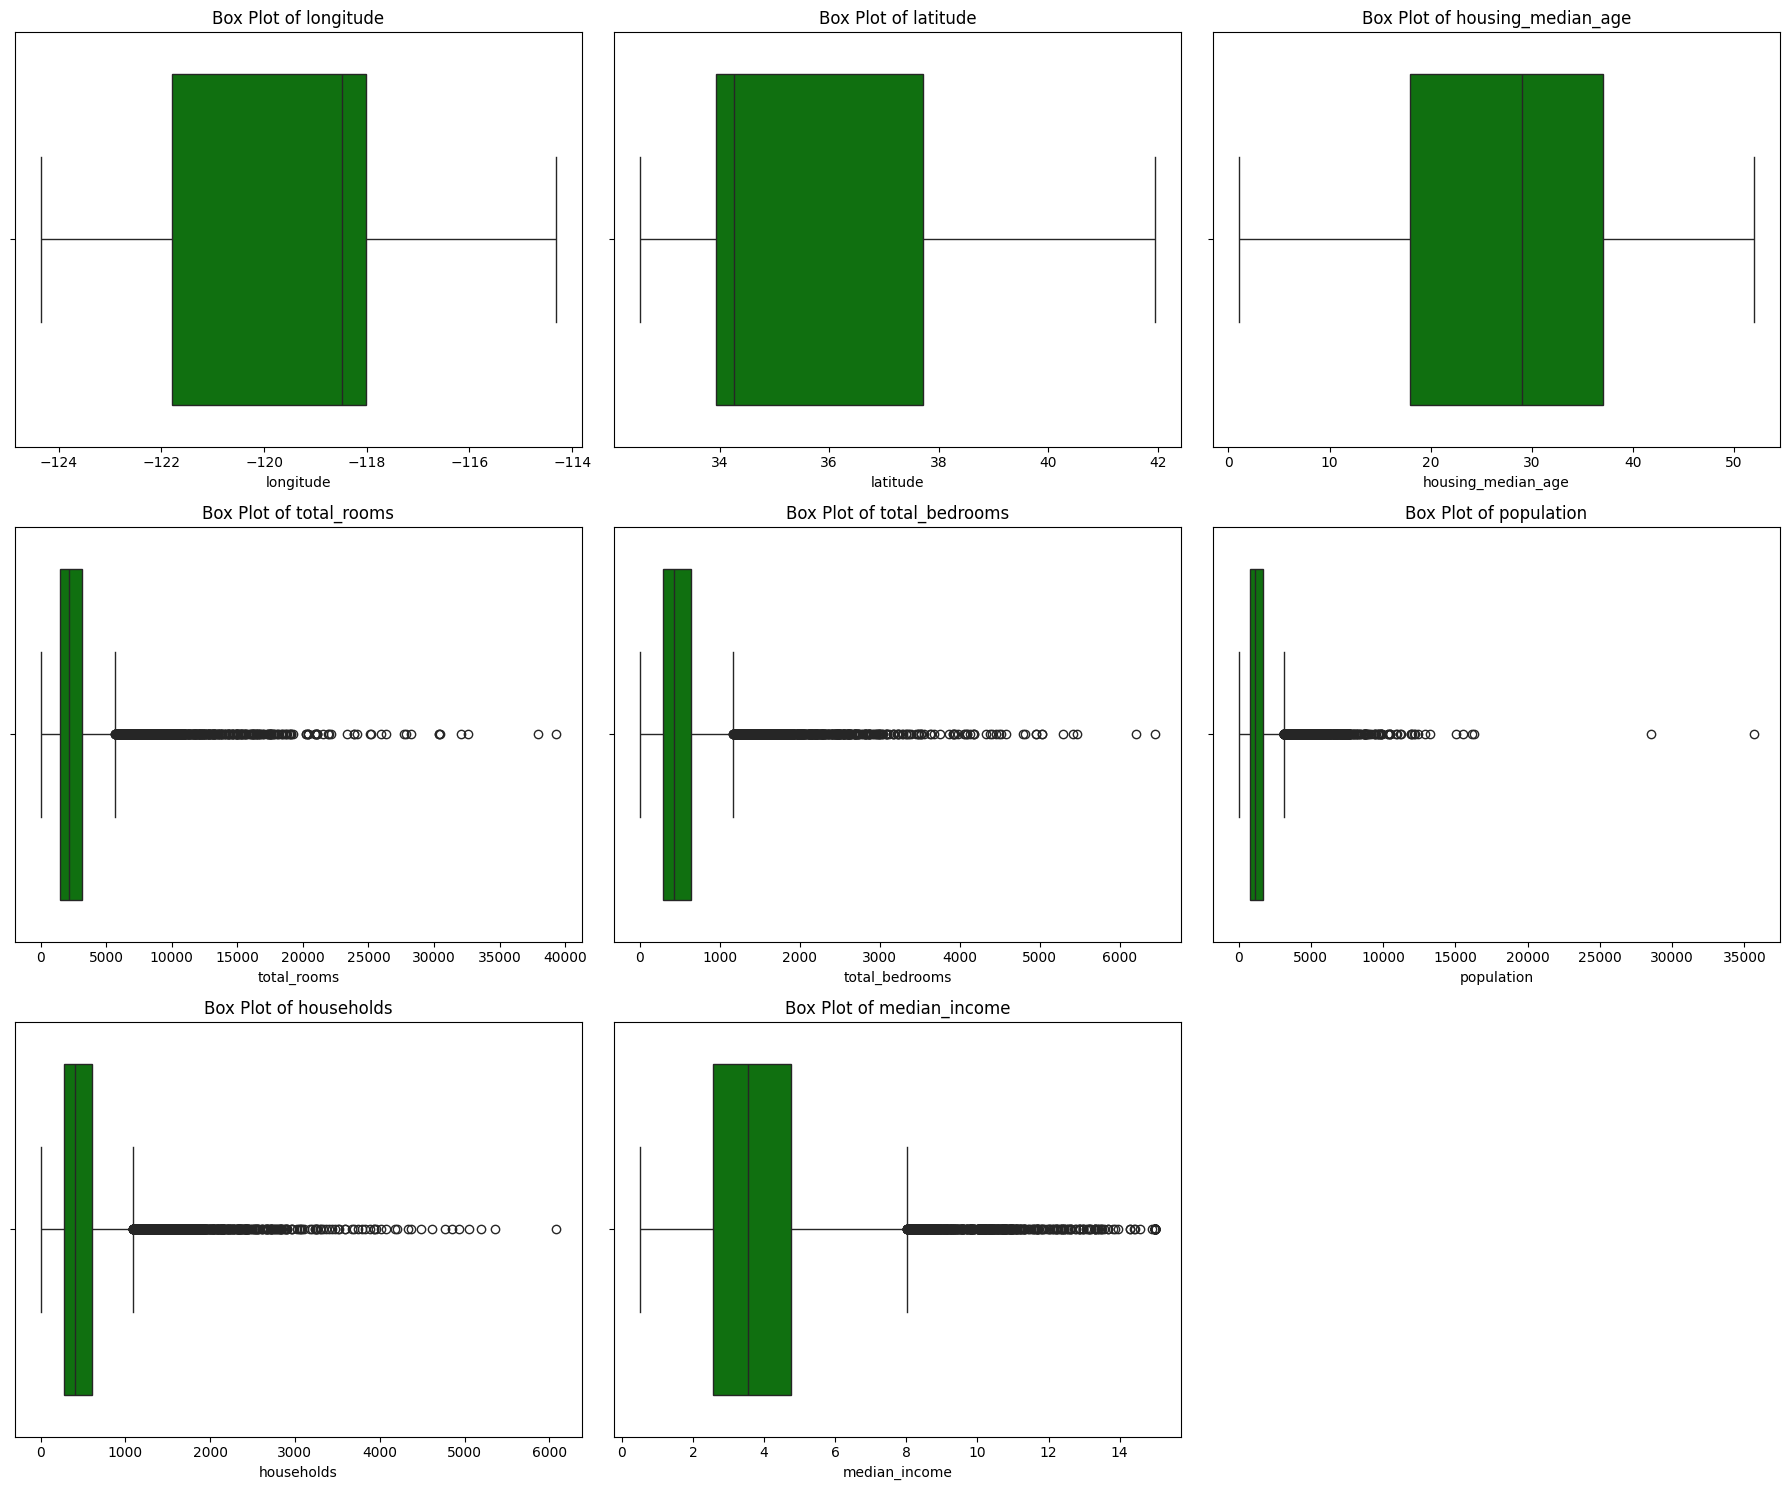

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select numerical columns (excluding the target and engineered features for this visualization)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude_viz = ['median_house_value', 'income_per_room', 'bedrooms_per_household', 'rooms_per_person']
numerical_cols_viz = [col for col in numerical_cols if col not in cols_to_exclude_viz]


# Calculate the number of rows needed for subplots (3 plots per row)
n_cols = 3
n_rows = (len(numerical_cols_viz) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols_viz):
    sns.boxplot(x=df[col], ax=axes[i], color='green')
    axes[i].set_title(f'Box Plot of {col}')

# Remove any unused subplots if the number of columns is not a multiple of 3
for j in range(len(numerical_cols_viz), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
train_set["income_per_room"] = train_set["median_income"] / train_set["total_rooms"]
train_set["bedrooms_per_household"] = train_set["total_bedrooms"] / train_set["households"]
train_set["rooms_per_person"] = train_set["total_rooms"] / train_set["population"]

test_set['income_per_room'] = test_set['median_income'] / test_set['total_rooms']
test_set['bedrooms_per_household'] = test_set['total_bedrooms'] / test_set['households']
test_set['rooms_per_person'] = test_set['total_rooms'] / test_set['population']

display(train_set.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_per_room,bedrooms_per_household,rooms_per_person
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,0.001043,1.006421,1.359130
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,0.001127,1.041005,2.573820
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,0.002191,0.985119,2.073224
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,0.001367,1.033803,1.002116
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,0.001492,1.134211,2.725400


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation of all numerical features with 'median_house_value'
median_house_value_correlations = df.corr(numeric_only=True)['median_house_value'].apply(lambda x: abs(x)).sort_values(ascending=False)

# Display with a background gradient
display(median_house_value_correlations.to_frame().style.background_gradient(cmap='coolwarm'))

,median_house_value
median_house_value,1.000000
median_income,0.688075
latitude,0.144160
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
longitude,0.045967
population,0.024650


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation of all numerical features with 'median_house_value'
median_house_value_correlations = train_set.corr(numeric_only=True)['median_house_value'].apply(lambda x: abs(x)).sort_values(ascending=False)

# Display with a background gradient
display(median_house_value_correlations.to_frame().style.background_gradient(cmap='coolwarm'))

,median_house_value
median_house_value,1.000000
median_income,0.690647
rooms_per_person,0.212915
latitude,0.142983
total_rooms,0.133989
housing_median_age,0.103706
households,0.063714
bedrooms_per_household,0.051351
total_bedrooms,0.047980
longitude,0.046349


In [14]:
df = train_set.copy()

# Remove outliers based on the 99th percentile
df = df[df["median_income"] < train_set["median_income"].quantile(0.99)]
df = df[df["income_per_room"] < train_set["income_per_room"].quantile(0.99)]
df = df[df["bedrooms_per_household"] < train_set["bedrooms_per_household"].quantile(0.99)]
df = df[df["rooms_per_person"] < train_set["rooms_per_person"].quantile(0.99)]


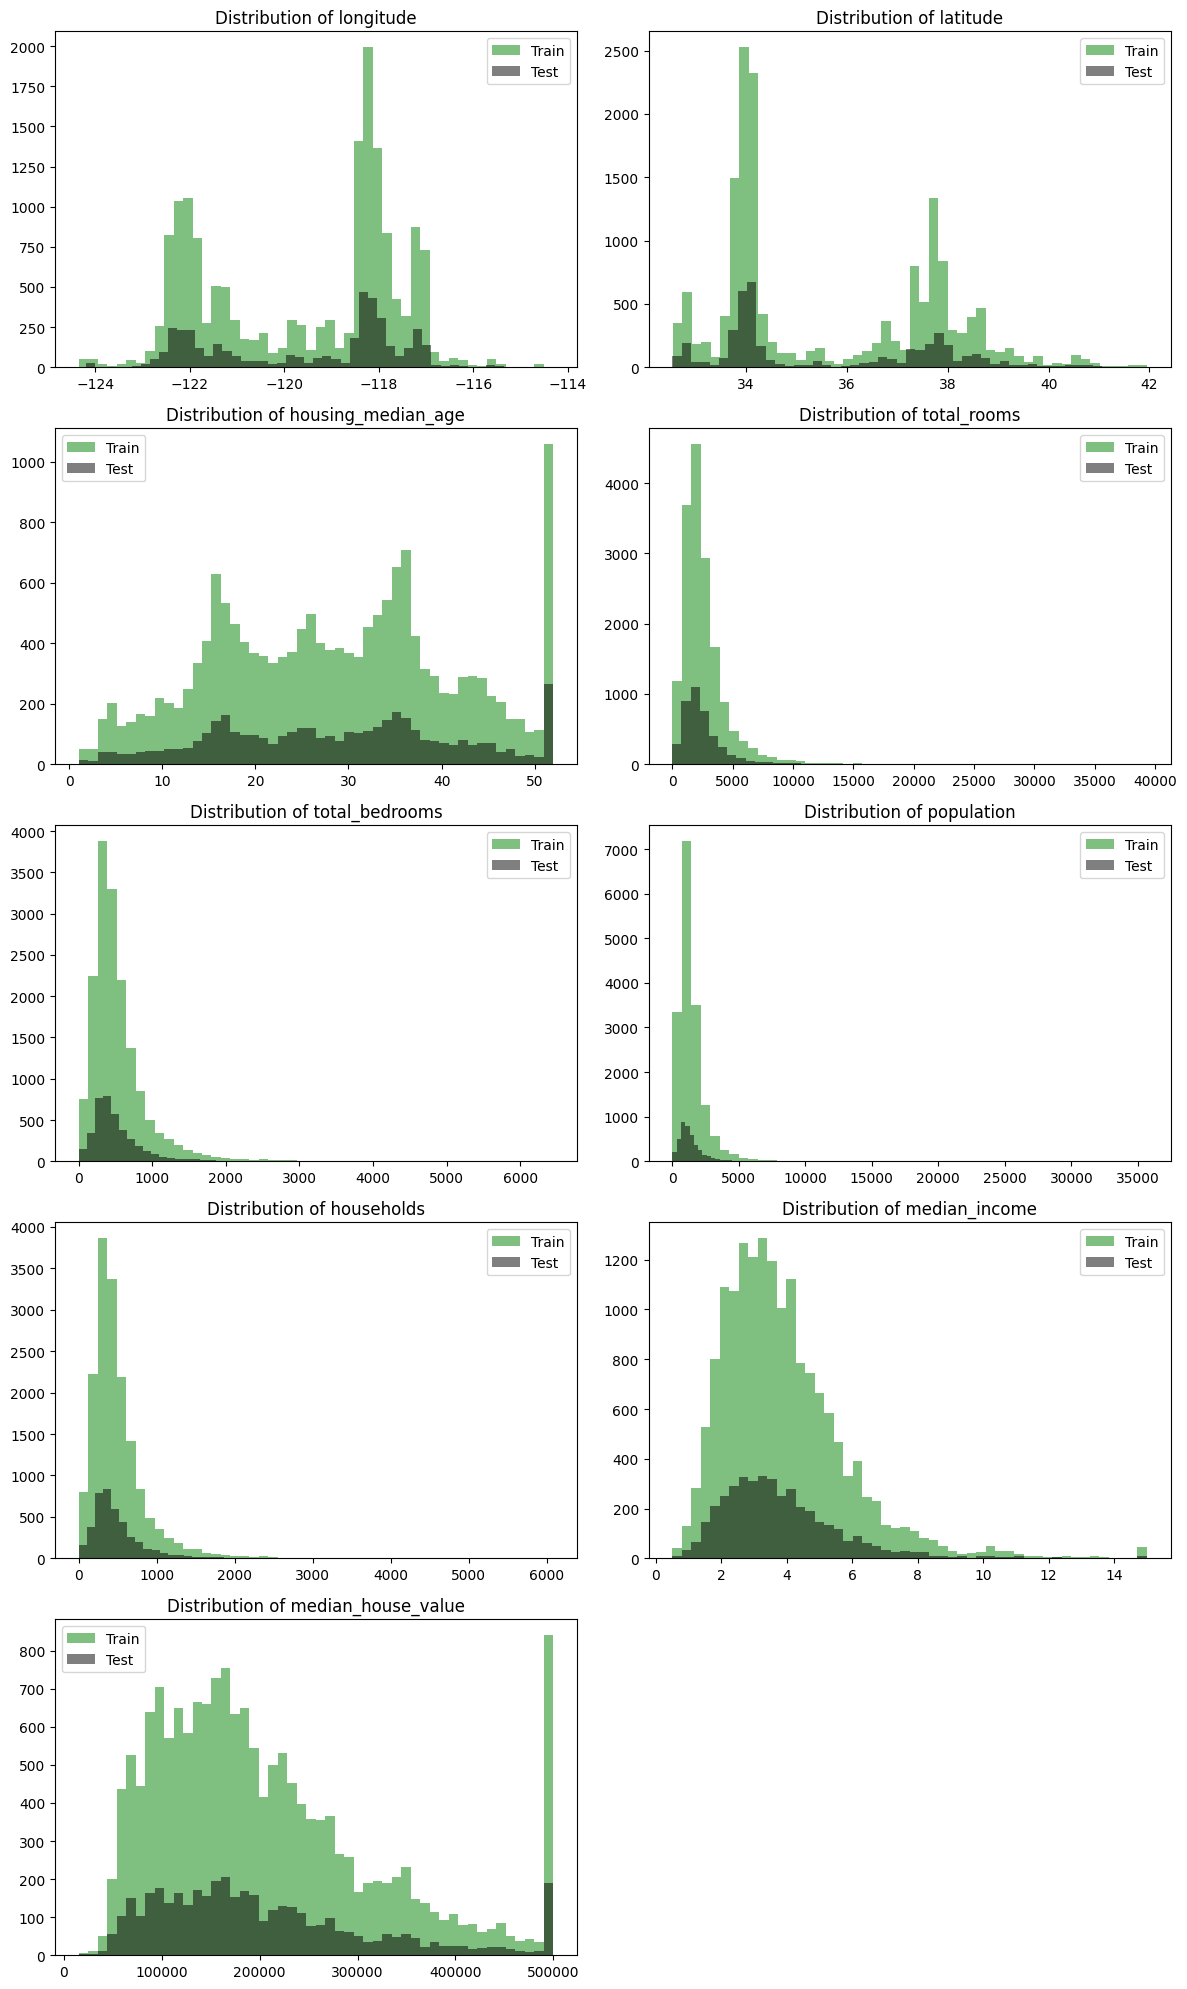

In [15]:
import matplotlib.pyplot as plt

cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Calculate the number of rows needed (2 plots per row)
n_rows = (len(cols) + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(cols):
    axes[i].hist(train_set[col], alpha=0.5, label='Train', bins=50, color='green')
    axes[i].hist(test_set[col], alpha=0.5, label='Test', bins=50, color='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

# Remove any unused subplots if the number of columns is odd
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
display(train_set.median_house_value.describe(), test_set.median_house_value.describe())

,median_house_value
count,16512.000000
mean,207194.693738
std,115622.626448
min,14999.000000
25%,119800.000000
50%,179850.000000
75%,265125.000000
max,500001.000000


,median_house_value
count,4128.000000
mean,205500.309593
std,114486.964288
min,14999.000000
25%,119275.000000
50%,178650.000000
75%,263000.000000
max,500001.000000


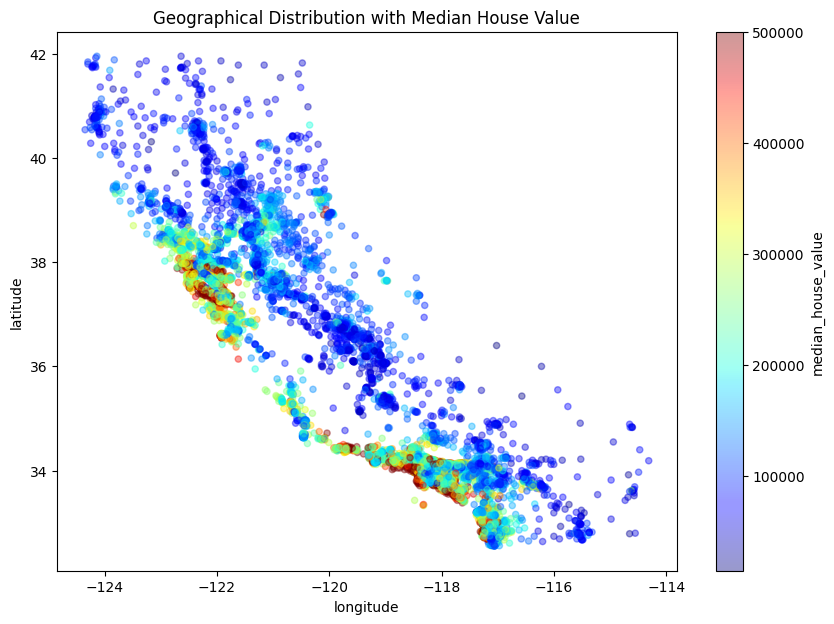

In [17]:
import matplotlib.pyplot as plt

train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("Geographical Distribution with Median House Value")
plt.show()

## 🏡 Insights from the Geographical Distribution Map

- The map shows that **housing values are generally higher** in areas closer to the coast 🌊  
- There seems to be a **strong correlation** between **location** (latitude 📍 and longitude 📍) and **median house value** 💰.  
- Areas with **higher median house values** (indicated by warmer colors like 🔴 and 🟠) appear to be **concentrated in specific regions**, suggesting **geographical factors** play a **significant role** in housing prices 🏠.


In [18]:
train_features = train_set.drop("median_house_value", axis=1)
train_labels = train_set["median_house_value"].copy()

test_features = test_set.drop("median_house_value", axis=1)
test_labels = test_set["median_house_value"].copy()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

housing_num = train_features.drop("ocean_proximity", axis=1)


num_pipeline = Pipeline([   ('imputer', SimpleImputer(strategy="median")),
                            ('std_scaler', RobustScaler()),
                        ])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([ ("num", num_pipeline, num_attribs),
                                    ("cat", OneHotEncoder(drop = 'first'), cat_attribs),
                                  ])

train_features_prepared = full_pipeline.fit_transform(train_features)
test_features_prepared = full_pipeline.transform(test_features)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(train_features_prepared, train_labels)

# Evaluate
preds = forest_reg.predict(test_features_prepared)
print("Random Forest R²:", r2_score(test_labels, preds))

Random Forest R²: 0.8268893366051712


In [21]:
# Cross Validation for RandomForestRegressor

from sklearn.model_selection import cross_val_score
import numpy as np

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_scores = cross_val_score(forest_reg, train_features_prepared, train_labels, scoring="neg_mean_squared_error", cv=5)

In [22]:
forest_rmse_scores = np.sqrt(-forest_scores)
display(forest_rmse_scores.mean(), forest_rmse_scores.std())

np.float64(48817.99977386822)

np.float64(446.78486443415636)

In [23]:
# Testing Accuracy

from sklearn.metrics import r2_score

forest_reg.fit(train_features_prepared, train_labels) # Fit the model after cross-validation

preds = forest_reg.predict(test_features_prepared)
print("Random Forest R²:", r2_score(test_labels, preds))

Random Forest R²: 0.8268893366051712
